<a href="https://colab.research.google.com/github/takayama-rado/trado_samples/blob/main/colab_files/gislr_rnn_islr_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download dataset and modules

In [ ]:
# I do not why, but only older virsion is works.
# https://github.com/wkentaro/gdown/issues/43#issuecomment-1426653602
!pip install gdown==4.6.0

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
import gdown

url = "https://drive.google.com/uc?id=1LJDGEwr4zqpBftjqO9SiSOLgUcNhMiSe"
output = "gislr_top10.zip"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1LJDGEwr4zqpBftjqO9SiSOLgUcNhMiSe
To: /content/gislr_top10.zip
100%|██████████| 880M/880M [00:15<00:00, 58.5MB/s]


'gislr_top10.zip'

In [ ]:
url = "https://drive.google.com/uc?id=1EBIDzJcJhBURj6jkE6Hvwxka53Kk7Qc5"
output = "gislr_top30.zip"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1EBIDzJcJhBURj6jkE6Hvwxka53Kk7Qc5
To: /content/gislr_top30.zip
100%|██████████| 2.59G/2.59G [00:25<00:00, 100MB/s]


'gislr_top30.zip'

In [ ]:
!unzip -o gislr_top10.zip
!unzip -o gislr_top30.zip

Archive:  gislr_top10.zip
   creating: dataset_top10/
  inflating: dataset_top10/16069.hdf5  
  inflating: dataset_top10/18796.hdf5  
  inflating: dataset_top10/2044.hdf5  
  inflating: dataset_top10/22343.hdf5  
  inflating: dataset_top10/25571.hdf5  
  inflating: dataset_top10/26734.hdf5  
  inflating: dataset_top10/27610.hdf5  
  inflating: dataset_top10/28656.hdf5  
  inflating: dataset_top10/29302.hdf5  
  inflating: dataset_top10/30680.hdf5  
  inflating: dataset_top10/32319.hdf5  
  inflating: dataset_top10/34503.hdf5  
  inflating: dataset_top10/36257.hdf5  
  inflating: dataset_top10/37055.hdf5  
  inflating: dataset_top10/37779.hdf5  
  inflating: dataset_top10/4718.hdf5  
  inflating: dataset_top10/49445.hdf5  
  inflating: dataset_top10/53618.hdf5  
  inflating: dataset_top10/55372.hdf5  
  inflating: dataset_top10/61333.hdf5  
  inflating: dataset_top10/62590.hdf5  
  inflating: dataset_top10/LICENSE.txt  
  inflating: dataset_top10/sign_to_prediction_index_map.json  
Arch

In [ ]:
!ls dataset_top10
!ls dataset_top30

16069.hdf5  25571.hdf5	29302.hdf5  36257.hdf5	49445.hdf5  62590.hdf5
18796.hdf5  26734.hdf5	30680.hdf5  37055.hdf5	53618.hdf5  LICENSE.txt
2044.hdf5   27610.hdf5	32319.hdf5  37779.hdf5	55372.hdf5  sign_to_prediction_index_map.json
22343.hdf5  28656.hdf5	34503.hdf5  4718.hdf5	61333.hdf5
16069.hdf5  25571.hdf5	29302.hdf5  36257.hdf5	49445.hdf5  62590.hdf5
18796.hdf5  26734.hdf5	30680.hdf5  37055.hdf5	53618.hdf5  LICENSE.txt
2044.hdf5   27610.hdf5	32319.hdf5  37779.hdf5	55372.hdf5  sign_to_prediction_index_map.json
22343.hdf5  28656.hdf5	34503.hdf5  4718.hdf5	61333.hdf5


In [ ]:
!cat dataset_top10/sign_to_prediction_index_map.json
!cat dataset_top30/sign_to_prediction_index_map.json

{
    "listen": 0,
    "look": 1,
    "shhh": 2,
    "donkey": 3,
    "mouse": 4,
    "duck": 5,
    "uncle": 6,
    "hear": 7,
    "pretend": 8,
    "cow": 9
}{
    "listen": 0,
    "look": 1,
    "shhh": 2,
    "donkey": 3,
    "mouse": 4,
    "duck": 5,
    "uncle": 6,
    "hear": 7,
    "pretend": 8,
    "cow": 9,
    "bird": 10,
    "brown": 11,
    "who": 12,
    "sleepy": 13,
    "toothbrush": 14,
    "nuts": 15,
    "lips": 16,
    "bye": 17,
    "fireman": 18,
    "wake": 19,
    "awake": 20,
    "doll": 21,
    "cat": 22,
    "drink": 23,
    "pen": 24,
    "think": 25,
    "icecream": 26,
    "make": 27,
    "yesterday": 28,
    "first": 29
}

In [ ]:
!cat dataset_top10/LICENSE.txt
!cat dataset_top30/LICENSE.txt

The dataset provided by Natsuki Takayama (Takayama Research and Development Office) is licensed under CC-BY 4.0.
Author: Copyright 2024 Natsuki Takayama
Title: GISLR Top 10 dataset
Original licenser: Deaf Professional Arts Network and the Georgia Institute of Technology
Modification
- Extract 10 most frequent words.
- Packaged into HDF5 format.
The dataset provided by Natsuki Takayama (Takayama Research and Development Office) is licensed under CC-BY 4.0.
Author: Copyright 2024 Natsuki Takayama
Title: GISLR Top 30 dataset
Original licenser: Deaf Professional Arts Network and the Georgia Institute of Technology
Modification
- Extract 30 most frequent words.
- Packaged into HDF5 format.


In [ ]:
import h5py
with h5py.File("dataset_top10/16069.hdf5", "r") as fread:
    keys = list(fread.keys())
    print(keys)
    group = fread[keys[0]]
    print(group.keys())
    feature = group["feature"][:]
    token = group["token"][:]
    print(feature.shape)
    print(token)

['1109479272', '11121526', '1120349077', '1125456612', '1159046211', '1169128497', '1186032553', '1223803476', '1259708636', '1281972067', '129232566', '1334702305', '1340979012', '1352964057', '1370052047', '1383455381', '1431148933', '1435203624', '1437919781', '1458770030', '1462881097', '1469867050', '1474050058', '147607644', '1513539919', '1520635928', '1524297234', '153676122', '1537751003', '1542212461', '1551759770', '158232956', '1585855916', '1632709119', '1638742455', '1696757219', '177479476', '1779635114', '1791684792', '1801566440', '1831167282', '1867385690', '1880570146', '1901587887', '1910121429', '1919659282', '192873038', '1935012113', '1949620203', '195098847', '1983552660', '1989475963', '1998715062', '2007709802', '2036010239', '2036360025', '2046296211', '2082116372', '2098813002', '2109640010', '2121879330', '2141852087', '2148832702', '2152013823', '2166805079', '2176613834', '2184232774', '2213965523', '2249630763', '2256677805', '2263287955', '2263683020', 

In [ ]:
!wget https://github.com/takayama-rado/trado_samples/archive/master.zip

--2024-02-06 12:45:45--  https://github.com/takayama-rado/trado_samples/archive/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/takayama-rado/trado_samples/zip/main [following]
--2024-02-06 12:45:46--  https://codeload.github.com/takayama-rado/trado_samples/zip/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [            <=>     ]  73.58M  18.8MB/s    in 3.9s    

2024-02-06 12:45:50 (18.8 MB/s) - ‘master.zip’ saved [77154113]



In [ ]:
!unzip -o master.zip -d master

Archive:  master.zip
ce16ee74b806243c5db5a282889bde24fdea068e
   creating: master/trado_samples-main/
  inflating: master/trado_samples-main/.gitignore  
  inflating: master/trado_samples-main/LICENSE  
  inflating: master/trado_samples-main/README.md  
   creating: master/trado_samples-main/colab_files/
 extracting: master/trado_samples-main/colab_files/.gitkeep  
  inflating: master/trado_samples-main/colab_files/exp_affine_np_einsum.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_jax_static.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpholistic_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpothers_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_jax.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_numpy.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_tensorflow.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_torch.ipynb

In [ ]:
!mv master/trado_samples-main/src/modules_gislr .

In [ ]:
!rm -rf master master.zip gislr_top10.zip gislr_top30.zip

In [ ]:
!ls

dataset_top10  dataset_top30  modules_gislr  sample_data


# 2. Load library

In [ ]:
import json
import math
import sys
import time
from functools import partial
from pathlib import Path
from typing import (
    Any,
    Dict
)

# Third party's modules
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import (
    DataLoader)

from torchvision.transforms import Compose

# Local modules
sys.path.append("modules_gislr")
from modules_gislr.dataset import (
    HDF5Dataset,
    merge_padded_batch)
from modules_gislr.defines import (
    get_fullbody_landmarks
)
from modules_gislr.train_functions import (
    test_loop,
    train_loop,
    val_loop
)
from modules_gislr.transforms import (
    PartsBasedNormalization,
    ReplaceNan,
    SelectLandmarksAndFeature,
    ToTensor
)

# 3. Implement RNN ISLR model

## RNN encoder

In [ ]:
class RNNEncoder(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 rnn_type,
                 num_layers,
                 activation,
                 bidir,
                 dropout,
                 apply_mask,
                 proj_size=0):
        super().__init__()
        assert rnn_type in ["srnn", "lstm", "gru"]

        # If num_layers = 1, we remove dropout option of RNN layers to avoid warning.
        rnn_dropout = 0.0 if num_layers == 1 else dropout

        if rnn_type == "srnn":
            self.rnn = nn.RNN(input_size=in_channels,
                              hidden_size=out_channels,
                              num_layers=num_layers,
                              nonlinearity=activation,
                              batch_first=True,
                              dropout=rnn_dropout,
                              bidirectional=bidir)
        elif rnn_type == "lstm":
            self.rnn = nn.LSTM(input_size=in_channels,
                               hidden_size=out_channels,
                               num_layers=num_layers,
                               batch_first=True,
                               dropout=rnn_dropout,
                               bidirectional=bidir,
                               proj_size=proj_size)
        elif rnn_type == "gru":
            self.rnn = nn.GRU(input_size=in_channels,
                              hidden_size=out_channels,
                              num_layers=num_layers,
                              batch_first=True,
                              dropout=rnn_dropout,
                              bidirectional=bidir)
        # Dropout is added into intermediate RNN layers expect the last layer.
        # So, we add Dropout layer for the last layer explicitly.
        if dropout > 0:
            self.dropout = nn.Dropout(dropout)
        else:
            self.dropout = nn.Identity()

        self.num_layers = num_layers
        self.apply_mask = apply_mask

    def sep_state_layerwise(self, last_state):
        # `[D * num_layers, N, C] -> [N, D * num_layers, C]`
        last_state = last_state.permute(1, 0, 2)
        # `[N, D * num_layers, C] -> (num_layers, [N, D, C]) -> [N, D, C]`
        if self.num_layers > 1:
            last_state = torch.split(last_state, self.num_layers, dim=1)
        else:
            last_state = (last_state,)
        return last_state

    def forward(self, feature, feature_pad_mask=None):
        if feature_pad_mask is not None and self.apply_mask:
            tlength = feature_pad_mask.sum(axis=-1).detach().cpu()
            feature = nn.utils.rnn.pack_padded_sequence(
                feature, tlength, batch_first=True, enforce_sorted=False)

        if isinstance(self.rnn, nn.LSTM):
            hidden_seqs, (last_hstate, last_cstate) = self.rnn(feature)
        else:
            hidden_seqs, last_hstate = self.rnn(feature)
            last_cstate = None
        # Unpack hidden sequence.
        if isinstance(hidden_seqs, nn.utils.rnn.PackedSequence):
            hidden_seqs = nn.utils.rnn.unpack_sequence(hidden_seqs)
            # Back list to padded batch.
            hidden_seqs = nn.utils.rnn.pad_sequence(
                hidden_seqs, batch_first=True, padding_value=0.0)
        hidden_seqs = self.dropout(hidden_seqs)

        return hidden_seqs, last_hstate, last_cstate

## Update recognition head to apply masked global average pooling

In [ ]:
class GPoolRecognitionHead(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels

        self.head = nn.Linear(in_channels, out_channels)
        self._init_weight()

    def _init_weight(self):
        nn.init.normal_(self.head.weight,
                        mean=0.,
                        std=math.sqrt(1. / self.out_channels))

    def forward(self, feature, feature_pad_mask=None):
        # Averaging over temporal axis.
        # `[N, C, T] -> [N, C, 1] -> [N, C]`
        if feature_pad_mask is not None:
            tlength = feature_pad_mask.sum(dim=-1)
            feature = feature * feature_pad_mask.unsqueeze(1)
            feature = feature.sum(dim=-1) / tlength.unsqueeze(-1)
        else:
            feature = F.avg_pool1d(feature, kernel_size=feature.shape[-1])
        feature = feature.reshape(feature.shape[0], -1)

        # Predict.
        feature = self.head(feature)
        return feature

## ISLR model

In [ ]:
class RNNISLR(nn.Module):
    def __init__(self,
                 in_channels,
                 hidden_channels,
                 out_channels,
                 rnn_type="lstm",
                 rnn_num_layers=1,
                 rnn_activation="tanh",
                 rnn_bidir=False,
                 rnn_dropout=0.1,
                 apply_mask=True,
                 head_type="gpool"):
        super().__init__()
        assert rnn_type in ["srnn", "lstm", "gru"]
        assert head_type in ["gpool", "last_state"]

        self.linear = nn.Linear(in_channels, hidden_channels)
        self.activation = nn.ReLU()

        self.rnn = RNNEncoder(
            in_channels=hidden_channels,
            out_channels=hidden_channels,
            rnn_type=rnn_type,
            num_layers=rnn_num_layers,
            activation=rnn_activation,
            bidir=rnn_bidir,
            dropout=rnn_dropout,
            apply_mask=apply_mask)

        if rnn_bidir:
            self.head = GPoolRecognitionHead(hidden_channels * 2, out_channels)
        else:
            self.head = GPoolRecognitionHead(hidden_channels, out_channels)

        self.apply_mask = apply_mask
        self.head_type = head_type

    def forward(self, feature, feature_pad_mask=None):
        # Feature extraction.
        # `[N, C, T, J] -> [N, T, C, J] -> [N, T, C*J] -> [N, T, C']`
        N, C, T, J = feature.shape
        feature = feature.permute([0, 2, 1, 3])
        feature = feature.reshape(N, T, -1)

        feature = self.linear(feature)
        feature = self.activation(feature)

        hidden_seqs, last_hstate = self.rnn(feature, feature_pad_mask)[:2]

        if self.head_type == "gpool":
            # `[N, T, C'] -> [N, C', T]`
            feature = hidden_seqs.permute(0, 2, 1)
        else:  # "last_state"
            last_hstate = self.rnn.sep_state_layerwise(last_hstate)
            # `(num_layers, [N, D, C]) -> [N, D, C] -> [N, T(=1), D*C]`
            last_hstate = last_hstate[-1]
            feature = last_hstate.reshape([last_hstate.shape[0], 1, -1])
            # `[N, T, D*C] -> [N, D*C, T]`
            feature = feature.permute(0, 2, 1)

        if feature_pad_mask is not None and self.apply_mask:
            logit = self.head(feature, feature_pad_mask)
        else:
            logit = self.head(feature)
        return logit

## Sanity check

In [ ]:
# Access check.
dataset_dir = Path("dataset_top10")
files = list(dataset_dir.iterdir())
dictionary = [fin for fin in files if ".json" in fin.name][0]
hdf5_files = [fin for fin in files if ".hdf5" in fin.name]

print(dictionary)
print(hdf5_files)

dataset_top10/sign_to_prediction_index_map.json
[PosixPath('dataset_top10/28656.hdf5'), PosixPath('dataset_top10/34503.hdf5'), PosixPath('dataset_top10/55372.hdf5'), PosixPath('dataset_top10/61333.hdf5'), PosixPath('dataset_top10/4718.hdf5'), PosixPath('dataset_top10/22343.hdf5'), PosixPath('dataset_top10/49445.hdf5'), PosixPath('dataset_top10/62590.hdf5'), PosixPath('dataset_top10/27610.hdf5'), PosixPath('dataset_top10/2044.hdf5'), PosixPath('dataset_top10/36257.hdf5'), PosixPath('dataset_top10/30680.hdf5'), PosixPath('dataset_top10/26734.hdf5'), PosixPath('dataset_top10/53618.hdf5'), PosixPath('dataset_top10/16069.hdf5'), PosixPath('dataset_top10/37055.hdf5'), PosixPath('dataset_top10/25571.hdf5'), PosixPath('dataset_top10/32319.hdf5'), PosixPath('dataset_top10/29302.hdf5'), PosixPath('dataset_top10/37779.hdf5'), PosixPath('dataset_top10/18796.hdf5')]


In [ ]:
# Load dictionary.
with open(dictionary, "r") as fread:
    key2token = json.load(fread)

VOCAB = len(key2token)

In [ ]:
_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]
trans_select_feature = SelectLandmarksAndFeature(landmarks=use_landmarks, features=use_features)
trans_repnan = ReplaceNan()
trans_norm = PartsBasedNormalization(align_mode="framewise", scale_mode="unique")

pre_transforms = Compose([trans_select_feature,
                          trans_repnan,
                          trans_norm])
transforms = Compose([ToTensor()])

In [ ]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=0)

dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms, transforms=transforms)

dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
try:
    data = next(iter(dataloader))
    feature_origin = data["feature"]

    print(feature_origin.shape)
except Exception as inst:
    print(inst)

torch.Size([2, 2, 27, 130])


In [ ]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
hidden_channels = 64
out_channels = VOCAB
rnn_type="srnn"
rnn_bidir=False
rnn_dropout=0.1
apply_mask=False
# Fixed parameters.
# rnn_num_layers=1
# rnn_activattion="tanh"
# head_type="gpool"

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_bidir=rnn_bidir,
                apply_mask=apply_mask)
print(model)

# Sanity check.
logit = model(feature_origin)
print(logit.shape)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, batch_first=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=64, out_features=10, bias=True)
  )
)
torch.Size([2, 10])


# 4. Train and evaluation

In [ ]:
# Set common parameters.
batch_size = 32
load_into_ram = True
test_pid = 16069
num_workers = 1

epochs = 50
eval_every_n_epochs = 1
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} for computation.")

train_hdf5files = [fin for fin in hdf5_files if str(test_pid) not in fin.name]
val_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]
test_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]

_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]

Using cuda for computation.


In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(train_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(val_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(test_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

## 4.1 Compare RNN processing

### Default settings

In [ ]:
rnn_type="srnn"
rnn_bidir=False
apply_mask=False

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_bidir=rnn_bidir,
                apply_mask=apply_mask)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, batch_first=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [ ]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_default = np.array(val_losses)
test_accs_default = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_default.min()} at {np.argmin(val_losses_default)+1} epoch.")
print(f"Maximum accuracy:{test_accs_default.max()} at {np.argmax(test_accs_default)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.287600 [    0/ 3881]
loss:2.293232 [ 3200/ 3881]
Done. Time:2.5750799809999876
Start validation.
Done. Time:0.16685001899998042
Validation performance: 
 Avg loss:2.184312

Start evaluation.
Done. Time:0.8243443659999912
Test performance: 
 Accuracy:18.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.041358 [    0/ 3881]
loss:1.975056 [ 3200/ 3881]
Done. Time:1.8788150299999984
Start validation.
Done. Time:0.165091910000001
Validation performance: 
 Avg loss:2.055372

Start evaluation.
Done. Time:0.7208025940000198
Test performance: 
 Accuracy:35.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.984544 [    0/ 3881]
loss:2.425066 [ 3200/ 3881]
Done. Time:2.565821701999994
Start validation.
Done. Time:0.28159601400000156
Validation 

### Apply padding masking

In [ ]:
rnn_type="srnn"
rnn_bidir=False
apply_mask=True

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_bidir=rnn_bidir,
                apply_mask=apply_mask)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, batch_first=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [ ]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_masking = np.array(val_losses)
test_accs_masking = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_masking.min()} at {np.argmin(val_losses_masking)+1} epoch.")
print(f"Maximum accuracy:{test_accs_masking.max()} at {np.argmax(test_accs_masking)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.327023 [    0/ 3881]
loss:1.790753 [ 3200/ 3881]
Done. Time:5.40986354000006
Start validation.
Done. Time:0.1931195500000058
Validation performance: 
 Avg loss:2.089700

Start evaluation.
Done. Time:0.956383900999981
Test performance: 
 Accuracy:25.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.701228 [    0/ 3881]
loss:1.493291 [ 3200/ 3881]
Done. Time:3.849982438999973
Start validation.
Done. Time:0.19705598299992744
Validation performance: 
 Avg loss:1.606332

Start evaluation.
Done. Time:0.9624671399999443
Test performance: 
 Accuracy:49.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.237349 [    0/ 3881]
loss:1.039729 [ 3200/ 3881]
Done. Time:4.521274769999991
Start validation.
Done. Time:0.22875991099999737
Validation per

### Apply bidirectional RNN

In [ ]:
rnn_type="srnn"
rnn_bidir=True
apply_mask=True

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_bidir=rnn_bidir,
                apply_mask=apply_mask)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, batch_first=True, bidirectional=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_masking_bidir = np.array(val_losses)
test_accs_masking_bidir = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_masking_bidir.min()} at {np.argmin(val_losses_masking_bidir)+1} epoch.")
print(f"Maximum accuracy:{test_accs_masking_bidir.max()} at {np.argmax(test_accs_masking_bidir)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.499515 [    0/ 3881]
loss:1.677484 [ 3200/ 3881]
Done. Time:4.950325389999989
Start validation.
Done. Time:0.39081855500000984
Validation performance: 
 Avg loss:1.841290

Start evaluation.
Done. Time:1.1402239510000527
Test performance: 
 Accuracy:34.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.647798 [    0/ 3881]
loss:1.113124 [ 3200/ 3881]
Done. Time:4.3400608030000285
Start validation.
Done. Time:0.2082479839999678
Validation performance: 
 Avg loss:1.514403

Start evaluation.
Done. Time:1.0739718059999177
Test performance: 
 Accuracy:42.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.121951 [    0/ 3881]
loss:0.778276 [ 3200/ 3881]
Done. Time:4.7207296090000455
Start validation.
Done. Time:0.3446065330000465
Validation 

### Plot result

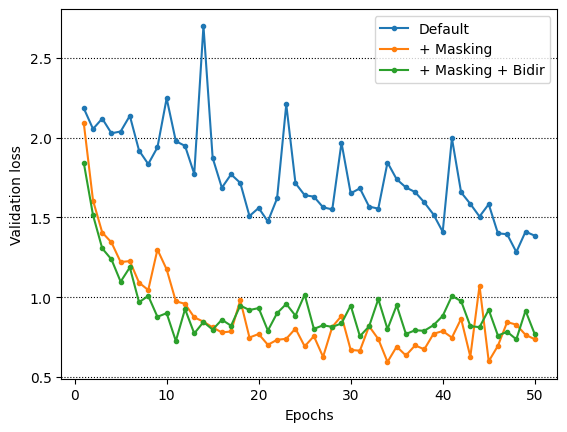

In [ ]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_default)+1)
plt.plot(xs, val_losses_default, label="Default", marker=".")
plt.plot(xs, val_losses_masking, label="+ Masking", marker=".")
plt.plot(xs, val_losses_masking_bidir, label="+ Masking + Bidir", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()
plt.show()

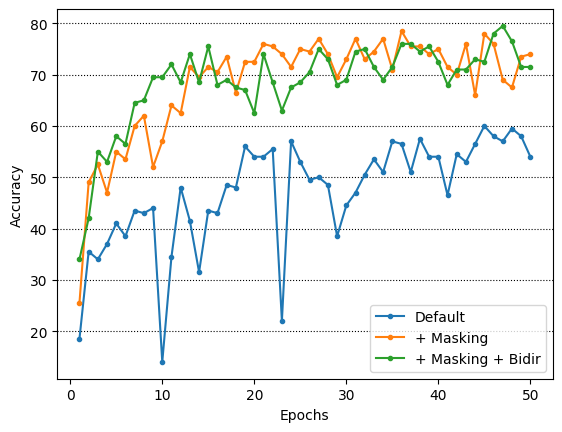

In [ ]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_default)+1)
plt.plot(xs, test_accs_default, label="Default", marker=".")
plt.plot(xs, test_accs_masking, label="+ Masking", marker=".")
plt.plot(xs, test_accs_masking_bidir, label="+ Masking + Bidir", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 4.2 Compare layer types using top-10 dataset.

### LSTM

In [ ]:
rnn_type="lstm"
rnn_bidir=True
apply_mask=True

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_bidir=rnn_bidir,
                apply_mask=apply_mask)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): LSTM(64, 64, batch_first=True, bidirectional=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_masking_bidir_lstm_top10 = np.array(val_losses)
test_accs_masking_bidir_lstm_top10 = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_masking_bidir_lstm_top10.min()} at {np.argmin(val_losses_masking_bidir_lstm_top10)+1} epoch.")
print(f"Maximum accuracy:{test_accs_masking_bidir_lstm_top10.max()} at {np.argmax(test_accs_masking_bidir_lstm_top10)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.375782 [    0/ 3881]
loss:1.893945 [ 3200/ 3881]
Done. Time:4.8409680160000335
Start validation.
Done. Time:0.22464975100001539
Validation performance: 
 Avg loss:1.856557

Start evaluation.
Done. Time:1.0770547580000311
Test performance: 
 Accuracy:38.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.475932 [    0/ 3881]
loss:1.052171 [ 3200/ 3881]
Done. Time:4.50577530999999
Start validation.
Done. Time:0.21356889199978468
Validation performance: 
 Avg loss:1.402225

Start evaluation.
Done. Time:1.2728492249998453
Test performance: 
 Accuracy:56.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.194970 [    0/ 3881]
loss:0.933929 [ 3200/ 3881]
Done. Time:4.925539086000072
Start validation.
Done. Time:0.2232053560001077
Validation p

### GRU

In [ ]:
rnn_type="gru"
rnn_bidir=True
apply_mask=True

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_bidir=rnn_bidir,
                apply_mask=apply_mask)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): GRU(64, 64, batch_first=True, bidirectional=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_masking_bidir_gru_top10 = np.array(val_losses)
test_accs_masking_bidir_gru_top10 = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_masking_bidir_gru_top10.min()} at {np.argmin(val_losses_masking_bidir_gru_top10)+1} epoch.")
print(f"Maximum accuracy:{test_accs_masking_bidir_gru_top10.max()} at {np.argmax(test_accs_masking_bidir_gru_top10)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.382871 [    0/ 3881]
loss:1.762709 [ 3200/ 3881]
Done. Time:5.307633266000039
Start validation.
Done. Time:0.22659026299993457
Validation performance: 
 Avg loss:1.986418

Start evaluation.
Done. Time:1.0856671080000524
Test performance: 
 Accuracy:35.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.683566 [    0/ 3881]
loss:1.195569 [ 3200/ 3881]
Done. Time:4.435172819999934
Start validation.
Done. Time:0.21773625399987395
Validation performance: 
 Avg loss:1.727145

Start evaluation.
Done. Time:1.064999433000139
Test performance: 
 Accuracy:47.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.140119 [    0/ 3881]
loss:0.836522 [ 3200/ 3881]
Done. Time:5.3417408980001255
Start validation.
Done. Time:0.21995089000006374
Validation 

### Plort result

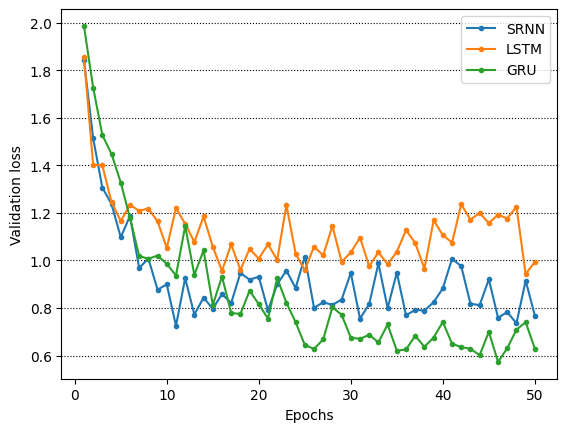

In [ ]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_masking_bidir)+1)
plt.plot(xs, val_losses_masking_bidir, label="SRNN", marker=".")
plt.plot(xs, val_losses_masking_bidir_lstm_top10, label="LSTM", marker=".")
plt.plot(xs, val_losses_masking_bidir_gru_top10, label="GRU", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()
plt.show()

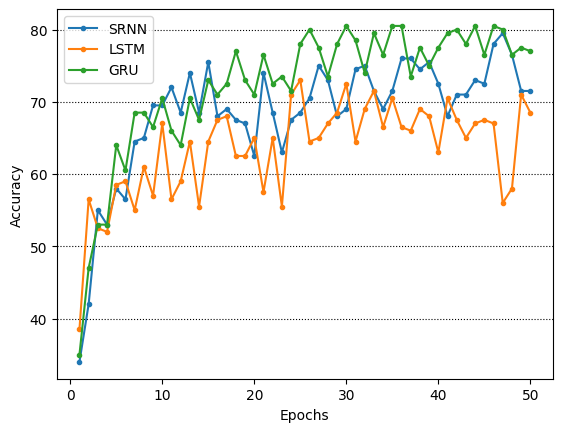

In [ ]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_masking_bidir)+1)
plt.plot(xs, test_accs_masking_bidir, label="SRNN", marker=".")
plt.plot(xs, test_accs_masking_bidir_lstm_top10, label="LSTM", marker=".")
plt.plot(xs, test_accs_masking_bidir_gru_top10, label="GRU", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 4.3 Compare layer types using top-30 dataset.

### Common settings

In [ ]:
# Access check.
dataset_dir = Path("dataset_top30")
files = list(dataset_dir.iterdir())
dictionary = [fin for fin in files if ".json" in fin.name][0]
hdf5_files = [fin for fin in files if ".hdf5" in fin.name]

print(dictionary)
print(hdf5_files)

dataset_top30/sign_to_prediction_index_map.json
[PosixPath('dataset_top30/28656.hdf5'), PosixPath('dataset_top30/34503.hdf5'), PosixPath('dataset_top30/55372.hdf5'), PosixPath('dataset_top30/61333.hdf5'), PosixPath('dataset_top30/4718.hdf5'), PosixPath('dataset_top30/22343.hdf5'), PosixPath('dataset_top30/49445.hdf5'), PosixPath('dataset_top30/62590.hdf5'), PosixPath('dataset_top30/27610.hdf5'), PosixPath('dataset_top30/2044.hdf5'), PosixPath('dataset_top30/36257.hdf5'), PosixPath('dataset_top30/30680.hdf5'), PosixPath('dataset_top30/26734.hdf5'), PosixPath('dataset_top30/53618.hdf5'), PosixPath('dataset_top30/16069.hdf5'), PosixPath('dataset_top30/37055.hdf5'), PosixPath('dataset_top30/25571.hdf5'), PosixPath('dataset_top30/32319.hdf5'), PosixPath('dataset_top30/29302.hdf5'), PosixPath('dataset_top30/37779.hdf5'), PosixPath('dataset_top30/18796.hdf5')]


In [ ]:
# Load dictionary.
with open(dictionary, "r") as fread:
    key2token = json.load(fread)

VOCAB = len(key2token)
out_channels = VOCAB

In [ ]:
# Set common parameters.
train_hdf5files = [fin for fin in hdf5_files if str(test_pid) not in fin.name]
val_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]
test_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]

# Build dataloaders.
train_dataset = HDF5Dataset(train_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(val_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(test_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

### SRNN

In [ ]:
rnn_type="srnn"
rnn_bidir=True
apply_mask=True

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_bidir=rnn_bidir,
                apply_mask=apply_mask)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, batch_first=True, bidirectional=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=30, bias=True)
  )
)


In [ ]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_masking_bidir_srnn_top30 = np.array(val_losses)
test_accs_masking_bidir_srnn_top30 = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_masking_bidir_srnn_top30.min()} at {np.argmin(val_losses_masking_bidir_srnn_top30)+1} epoch.")
print(f"Maximum accuracy:{test_accs_masking_bidir_srnn_top30.max()} at {np.argmax(test_accs_masking_bidir_srnn_top30)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.360540 [    0/11480]
loss:3.179698 [ 3200/11480]
loss:2.739559 [ 6400/11480]
loss:2.830000 [ 9600/11480]
Done. Time:13.831765143999974
Start validation.
Done. Time:0.5334886509999706
Validation performance: 
 Avg loss:2.606063

Start evaluation.
Done. Time:3.7781453209997835
Test performance: 
 Accuracy:21.4%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.229378 [    0/11480]
loss:2.107449 [ 3200/11480]
loss:2.327576 [ 6400/11480]
loss:2.107184 [ 9600/11480]
Done. Time:13.750489991999984
Start validation.
Done. Time:0.5458934260000206
Validation performance: 
 Avg loss:2.480886

Start evaluation.
Done. Time:3.2586114430000634
Test performance: 
 Accuracy:33.8%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.963632 [    0/11480]
loss:

### LSTM

In [ ]:
rnn_type="lstm"
rnn_bidir=True
apply_mask=True

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_bidir=rnn_bidir,
                apply_mask=apply_mask)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): LSTM(64, 64, batch_first=True, bidirectional=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=30, bias=True)
  )
)


In [ ]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_masking_bidir_lstm_top30 = np.array(val_losses)
test_accs_masking_bidir_lstm_top30 = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_masking_bidir_lstm_top30.min()} at {np.argmin(val_losses_masking_bidir_lstm_top30)+1} epoch.")
print(f"Maximum accuracy:{test_accs_masking_bidir_lstm_top30.max()} at {np.argmax(test_accs_masking_bidir_lstm_top30)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.412778 [    0/11480]
loss:3.307265 [ 3200/11480]
loss:2.747274 [ 6400/11480]
loss:2.267720 [ 9600/11480]
Done. Time:14.937463100000059
Start validation.
Done. Time:0.5628335269998388
Validation performance: 
 Avg loss:2.523359

Start evaluation.
Done. Time:3.3253349410001647
Test performance: 
 Accuracy:21.9%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.289499 [    0/11480]
loss:2.090364 [ 3200/11480]
loss:1.933838 [ 6400/11480]
loss:2.219107 [ 9600/11480]
Done. Time:14.356671974000164
Start validation.
Done. Time:0.5380933689998528
Validation performance: 
 Avg loss:2.165648

Start evaluation.
Done. Time:3.4630760350000855
Test performance: 
 Accuracy:33.8%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.953794 [    0/11480]
loss:

### GRU

In [ ]:
rnn_type="gru"
rnn_bidir=True
apply_mask=True

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_bidir=rnn_bidir,
                apply_mask=apply_mask)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): GRU(64, 64, batch_first=True, bidirectional=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=30, bias=True)
  )
)


In [ ]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_masking_bidir_gru_top30 = np.array(val_losses)
test_accs_masking_bidir_gru_top30 = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_masking_bidir_gru_top30.min()} at {np.argmin(val_losses_masking_bidir_gru_top30)+1} epoch.")
print(f"Maximum accuracy:{test_accs_masking_bidir_gru_top30.max()} at {np.argmax(test_accs_masking_bidir_gru_top30)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.444628 [    0/11480]
loss:3.272869 [ 3200/11480]
loss:2.930779 [ 6400/11480]
loss:2.486678 [ 9600/11480]
Done. Time:14.076964361000137
Start validation.
Done. Time:0.9742942079997192
Validation performance: 
 Avg loss:2.583495

Start evaluation.
Done. Time:3.389075311000397
Test performance: 
 Accuracy:22.6%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.253043 [    0/11480]
loss:2.596020 [ 3200/11480]
loss:1.825983 [ 6400/11480]
loss:1.826761 [ 9600/11480]
Done. Time:13.730261672999859
Start validation.
Done. Time:0.5306529659997068
Validation performance: 
 Avg loss:2.200004

Start evaluation.
Done. Time:3.1787174219998633
Test performance: 
 Accuracy:38.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.917417 [    0/11480]
loss:2

### Plot result

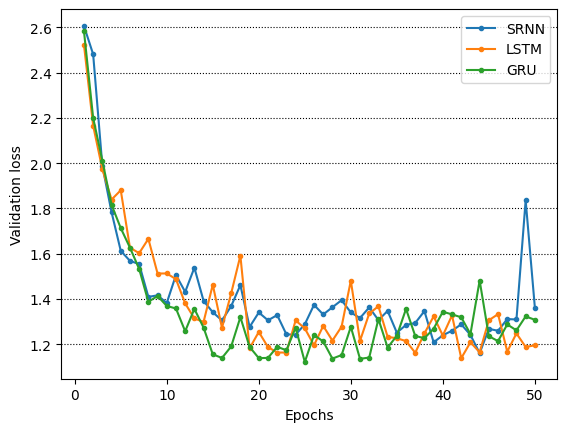

In [ ]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_masking_bidir_srnn_top30)+1)
plt.plot(xs, val_losses_masking_bidir_srnn_top30, label="SRNN", marker=".")
plt.plot(xs, val_losses_masking_bidir_lstm_top30, label="LSTM", marker=".")
plt.plot(xs, val_losses_masking_bidir_gru_top30, label="GRU", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()
plt.show()

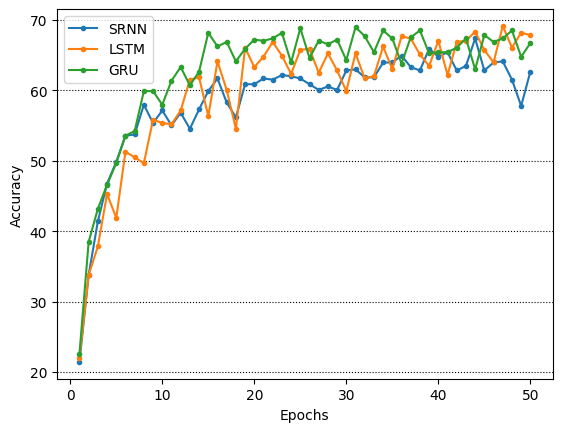

In [ ]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_masking_bidir_srnn_top30)+1)
plt.plot(xs, test_accs_masking_bidir_srnn_top30, label="SRNN", marker=".")
plt.plot(xs, test_accs_masking_bidir_lstm_top30, label="LSTM", marker=".")
plt.plot(xs, test_accs_masking_bidir_gru_top30, label="GRU", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()